# Descriptive Analysis on Video Game Characteristics and Review Scores

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Introduction

Using the video games dataset, I will be analyzing how the nature of the relationship between review scores and median play time changes for different release ratings in the dataset. By analyzing this, I hope to find insights into potential associations between the ratings of video games and other factors. Understanding this information can help guide video game developers on how they want to create and market their games to consumers.

## 2. Dataset Discussion

The video_games.csv dataset was downloaded on Feb 15, 2025 through this link: https://corgis-edu.github.io/corgis/csv/video_games/ 

Each row in the dataset contains metadata, sales, and playtime information about one video game that was released between 2004 and 2010. Playtime information was crowd-sourced from "How Long to Beat." 

This dataset is limited in that it only includes video games released between 2004 and 2010. The information in the dataset may not be representative of video games that were released before 2004 or in more recent years. Because of this, the insights from this analysis might not be as fitting when used to guide game developers on how to create and market newer releases. 

The three variables I will explore with this analysis are: Metrics.Review Score, Length.Main Story.Median, and Release.Rating. Metrics.Review Score represents a typical review score for the game, out of 100. Length.Main Story.Median represents the median time that players reported completing the main game storyline, in hours. Release.Rating represents the ESRB rating for the game, either E (for Everyone), T (for Teen), or M (for Mature).

In [25]:
video_games = pd.read_csv('video_games.csv')
video_games.head(5)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [26]:
video_games.shape[0]

1212

## 3. Dataset Cleaning

Create a dataset with only the Title, Metrics.Review Score, Length.Main Story.Median, and Release.Rating variables.

In [27]:
df = video_games[['Title', 'Metrics.Review Score', 'Length.Main Story.Median', 'Release.Rating']]
df

,Title,Metrics.Review Score,Length.Main Story.Median,Release.Rating
0,Super Mario 64 DS,85,14.500000,E
1,Lumines: Puzzle Fusion,89,10.000000,E
2,WarioWare Touched!,81,1.833333,E
3,Hot Shots Golf: Open Tee,81,0.000000,E
4,Spider-Man 2,61,8.000000,E
...,...,...,...,...
1207,Secret Files: Tunguska,71,8.716667,M
1208,Fading Shadows,62,0.000000,E
1209,Hail to the Chimp,51,0.000000,M
1210,Secret Files: Tunguska,64,8.716667,M


Missing Value Detection & Cleaning:

isna().value_counts() shows that there are no implicit missing values, and the unique values of each column do not contain explicit missing values, so no rows need to be dropped.

In [28]:
df['Metrics.Review Score'].unique()

array([85, 89, 81, 61, 67, 88, 75, 68, 46, 62, 63, 74, 51, 73, 60, 72, 48,
       66, 76, 91, 83, 77, 86, 82, 69, 44, 70, 79, 65, 80, 71, 58, 90, 59,
       64, 84, 45, 78, 37, 56, 38, 50, 54, 35, 43, 49, 34, 94, 95, 47, 53,
       57, 87, 52, 55, 39, 97, 92, 96, 25, 93, 20, 41, 27, 40, 28, 19, 98,
       42, 33, 30])

In [29]:
df['Length.Main Story.Median'].unique()

array([14.5       , 10.        ,  1.83333333,  0.        ,  8.        ,
       15.5       ,  0.53333333, 20.78333333,  1.08333333,  2.08333333,
        2.98333333,  2.23333333,  2.        ,  1.88333333,  5.75      ,
       15.        ,  5.        ,  9.88333333,  1.75      ,  4.5       ,
       22.15      ,  1.        , 13.85      , 70.        ,  5.11666667,
        8.98333333, 19.5       , 12.16666667, 23.05      ,  8.58333333,
       30.98333333, 18.01666667, 12.        ,  0.46666667,  7.        ,
       20.        ,  6.        ,  4.        ,  3.85      , 16.26666667,
        4.8       ,  6.66666667,  3.        , 10.41666667,  4.16666667,
        8.95      , 23.56666667,  4.81666667, 22.        ,  2.93333333,
        2.76666667,  3.53333333,  9.        ,  2.45      ,  1.5       ,
        7.5       ,  2.51666667, 14.96666667,  2.15      , 19.85      ,
       14.2       ,  3.2       ,  8.5       ,  4.71666667,  3.33333333,
       25.        , 27.48333333,  1.2       ,  8.36666667, 14.  

In [30]:
df['Release.Rating'].unique()

array(['E', 'M', 'T'], dtype=object)

In [31]:
df.isna().value_counts()

Title  Metrics.Review Score  Length.Main Story.Median  Release.Rating
False  False                 False                     False             1212
Name: count, dtype: int64

Sample Size Cleaning:

There are at least 10 observations for each category in the Release.Rating variable, so no rows need to be dropped.

In [32]:
df['Release.Rating'].value_counts()

Release.Rating
E    491
T    470
M    251
Name: count, dtype: int64

Outlier Cleaning:

There are low outliers for the review score and high outliers for the median playtime. I chose to keep the outliers for both variables in the dataset because dropping the outliers might cause the final analysis/models to be less representative of the entire dataset, specifically for longer games and games with low ratings. Understanding the association between low ratings with playtime/release rating and long games with review score/release rating would be beneficial for game developers who want insight into how to improve their games' reviews. 

There are also some high outliers with high playtimes and high review scores that I chose to keep in. There may be some insights we can find by analyzing their release ratings to see why those longer games received high ratings. 

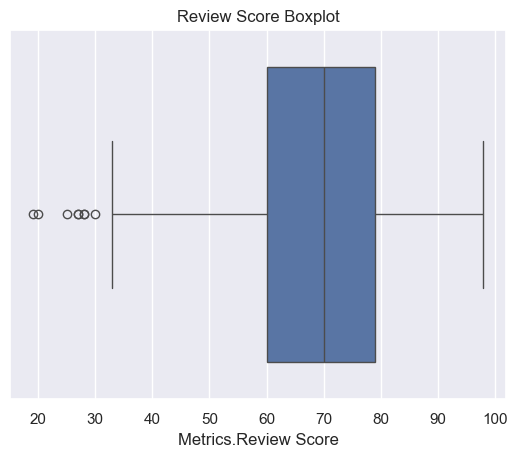

In [33]:
sns.boxplot(x='Metrics.Review Score', data=df)
plt.title("Review Score Boxplot")
plt.show()

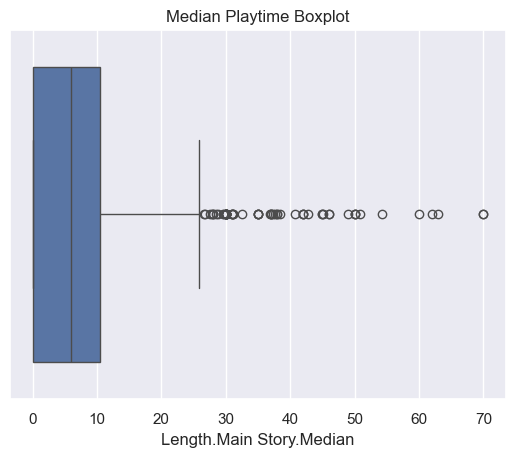

In [34]:
sns.boxplot(x='Length.Main Story.Median', data=df)
plt.title("Median Playtime Boxplot")
plt.show()

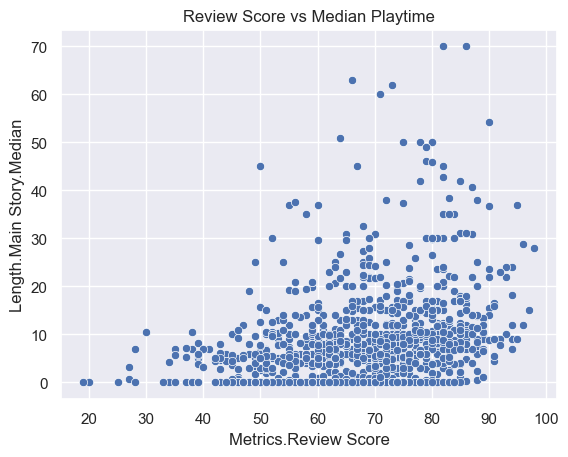

In [35]:
sns.scatterplot(x=df['Metrics.Review Score'], y=df['Length.Main Story.Median'], data=df)
plt.title("Review Score vs Median Playtime")
plt.show()

## 4. <u>Research Question</u>: How does the Relationship between `Metrics.Review Score` and `Length.Main Story.Median` Change based on Different Values of `Release.Rating` in the Dataset?

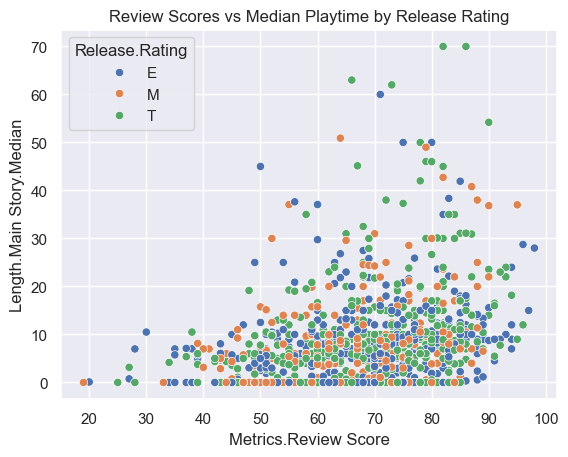

In [36]:
sns.scatterplot(x='Metrics.Review Score', y='Length.Main Story.Median', hue='Release.Rating', data=df)
plt.title('Review Scores vs Median Playtime by Release Rating')
plt.show()

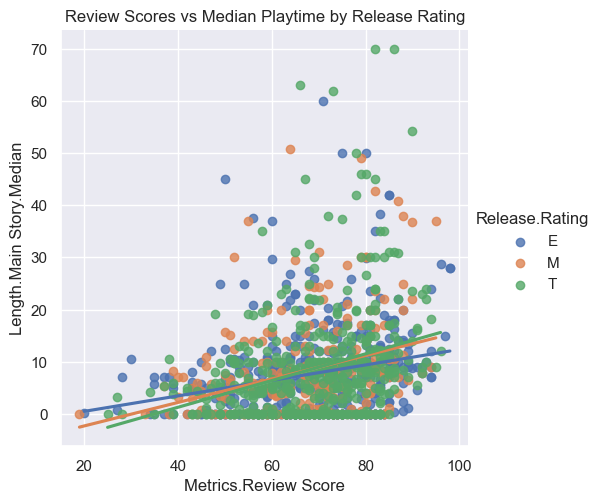

In [37]:
sns.lmplot(x='Metrics.Review Score', y='Length.Main Story.Median', hue='Release.Rating', ci=False, data=df)
plt.title('Review Scores vs Median Playtime by Release Rating')
plt.show()

In [38]:
df[['Release.Rating', 'Metrics.Review Score', 'Length.Main Story.Median']].groupby(['Release.Rating']).corr()

Metrics.Review Score  \
Release.Rating                                                  
E              Metrics.Review Score                  1.000000   
               Length.Main Story.Median              0.236357   
M              Metrics.Review Score                  1.000000   
               Length.Main Story.Median              0.304976   
T              Metrics.Review Score                  1.000000   
               Length.Main Story.Median              0.304404   

                                         Length.Main Story.Median  
Release.Rating                                                     
E              Metrics.Review Score                      0.236357  
               Length.Main Story.Median                  1.000000  
M              Metrics.Review Score                      0.304976  
               Length.Main Story.Median                  1.000000  
T              Metrics.Review Score                      0.304404  
               Length.Main Story.Median                  1.000000

The direction and shape of the relationship between the review score and median playtime stays the same across all release rating types - there appears to be a positive relationship between review score and median playtime. Overall, there seems to be more high outliers (high review score and high play time) for teen-rated video games than the other ratings as shown in the scatterplot.

The strength of the relationship between review score and median play time is relatively weak for all ratings, but is the strongest for the Mature and Teen rated video games with correlations of 0.304976 and 0.304404 respectively. The correlation metric is weaker for the Everyone rating (0.236357). Similarly, the slope of the relationship between review score and median play time is the steepest for the Teen and Mature ratings in the scatterplot. 


## 5. Conclusion

Based on this analysis, there is a weak correlation between the review score and median play time across all release rating types as indicated by the correlation metric. However, there is a slight positive relationship between review score and play time for each release rating type. The Mature and Teen rated video games exhibit a stronger positive relationship than the Everyone rated video games. 

One major shortcoming of this analysis is the use of the correlation metric as a measure of association between the variables. The scatterplots show that there does not seem to be a linear relationship between the median play time and review score variables, meaning that the correlation metric might not be the best metric to use when assessing this relationship. Future analyses could include using different methods that are better suited to this dataset and the variables selected, which may provide more accurate results that are insightful for game developers. 

Lastly, because the dataset only provides data for video games released between 2004-2010, this analysis may not be representative of video games that were released in more recent years. The insights from the analysis may not be as beneficial for game developers to use when dealing with games that were released outside of this date range.